In [104]:
import numpy as np
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
directory = './data/'

In [106]:
r = 1
data = pd.DataFrame()
data['input'] = pd.read_csv(directory + 'english_tagalog.test', header=None)  # input sentence
data['score'] = pd.read_csv(directory + 'res_' + str(r) + '.txt', header=None).astype(np.float32)  # anomaly score
data['anomalous'] = 1
data.loc[:123, 'anomalous'] = 0
# anomalous or not: 124 * 0 + 708 * 1
data

,input,score,anomalous
0,performing,0.000000,0
1,_the_part_,0.000000,0
2,i_did_besi,0.000000,0
3,des_cajoli,12.755096,0
4,ng_me_into,0.000000,0
...,...,...,...
827,a_nagasaka,0.000000,1
828,_panaog_pa,0.000000,1
829,kadto_sa_a,0.000000,1
830,kon_nga_an,0.000000,1


0.11026061600145799


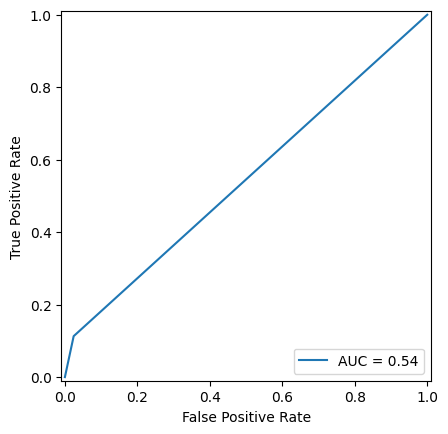

In [107]:
anomalous_data = data[data['anomalous'] == 1]
sensitivity = len(anomalous_data[anomalous_data['score'] > r]) / len(anomalous_data)

non_anomalous_data = data[data['anomalous'] == 0]
specificity = len(non_anomalous_data[non_anomalous_data['score'] < r]) / len(non_anomalous_data)
# specificity = 1 - specificity

data['y'] = (data['score'] > r)
# print(data['y'])

print(specificity * sensitivity)
# auc = metrics.roc_auc_score(specificity, sensitivity)
fpr, tpr, thresholds = metrics.roc_curve(data['anomalous'], data['y'])
auc = metrics.auc(fpr, tpr)
auc = metrics.roc_auc_score(data['anomalous'], data['y'])
roc = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)
roc.plot()

r = 1
0.11026061600145799
r = 2
0.2191088026243849
r = 3
0.008064516129032258
r = 4
0.008064516129032258
r = 5
0.0
r = 6
0.0
r = 7
0.0
r = 8
0.0
r = 9
0.0


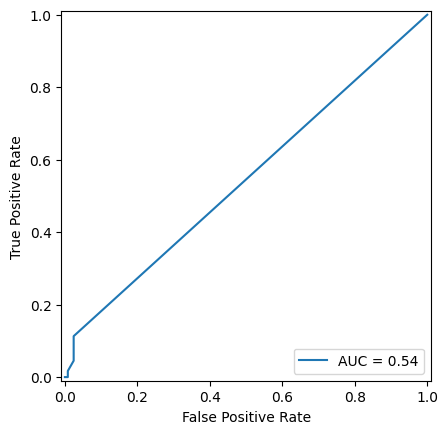

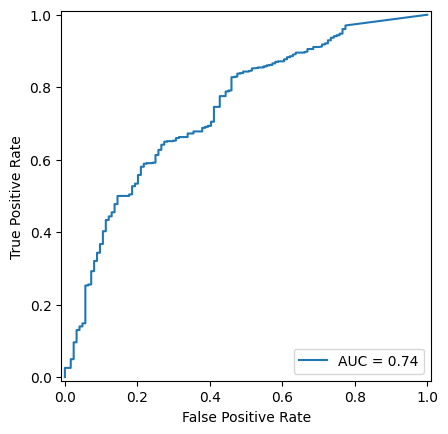

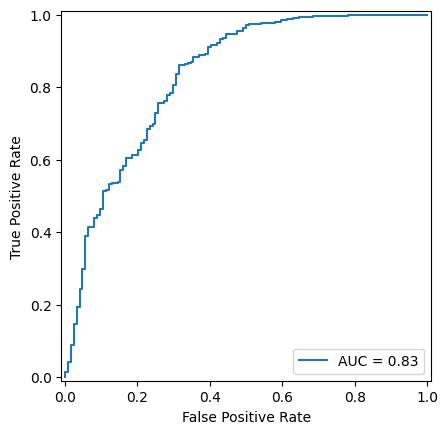

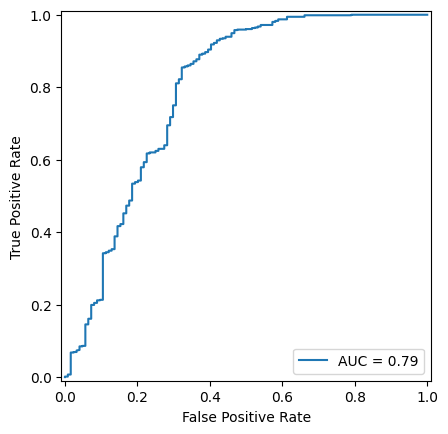

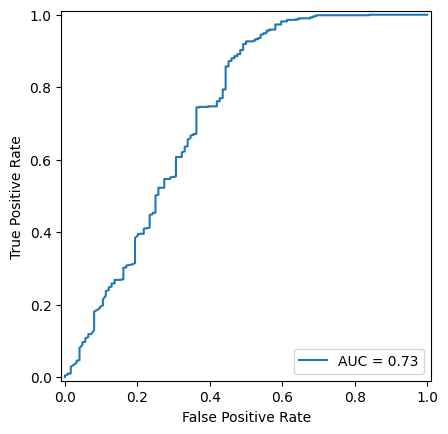

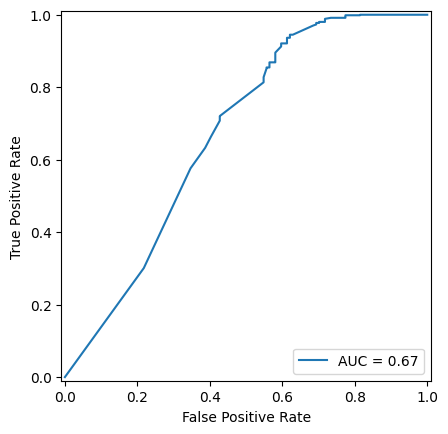

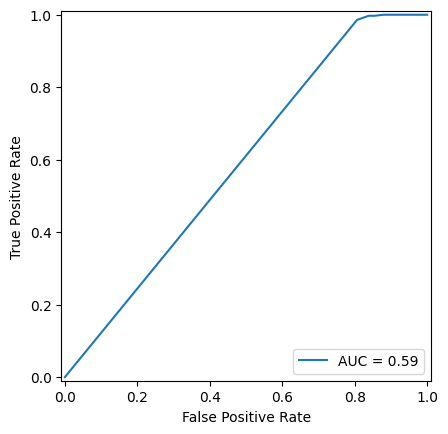

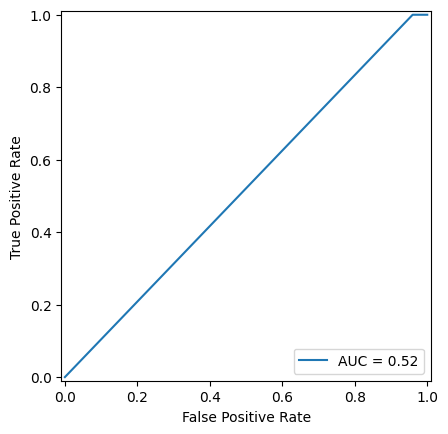

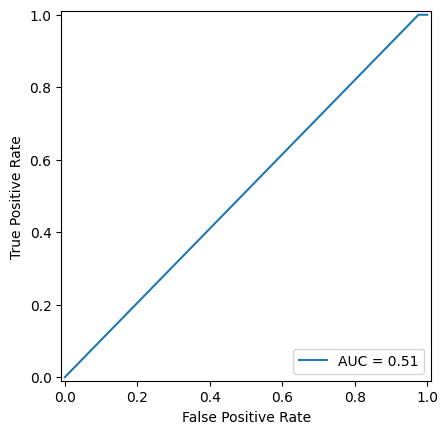

In [110]:
for r in range(1, 10):
    print('r = ' + str(r))
    data = pd.DataFrame()
    data['input'] = pd.read_csv(directory + 'english_tagalog.test', header=None)  # input sentence
    data['score'] = pd.read_csv(directory + 'res_' + str(r) + '.txt', header=None).astype(np.float32)  # anomaly score
    data['anomalous'] = 1
    data.loc[:123, 'anomalous'] = 0
    # anomalous or not: 124 * 0 + 708 * 1
    
    anomalous_data = data[data['anomalous'] == 1]
    sensitivity = len(anomalous_data[anomalous_data['score'] > r]) / len(anomalous_data)

    non_anomalous_data = data[data['anomalous'] == 0]
    specificity = len(non_anomalous_data[non_anomalous_data['score'] < r]) / len(non_anomalous_data)
    # specificity = 1 - specificity

    data['y'] = (data['score'] > r)

    print(specificity * sensitivity)
    fpr, tpr, thresholds = metrics.roc_curve(data['anomalous'], data['score'])
    auc = metrics.auc(fpr, tpr)
    auc = metrics.roc_auc_score(data['anomalous'], data['score'])
    roc = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)
    roc.plot()

0.0
0.0
0.016086135895676045
0.0


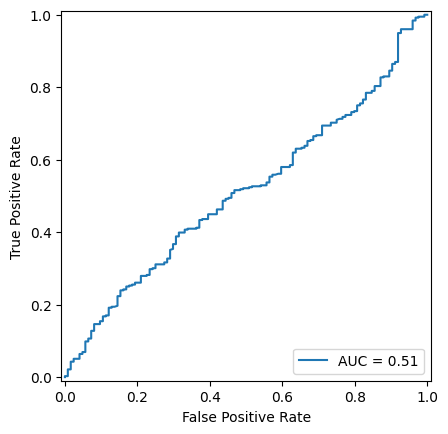

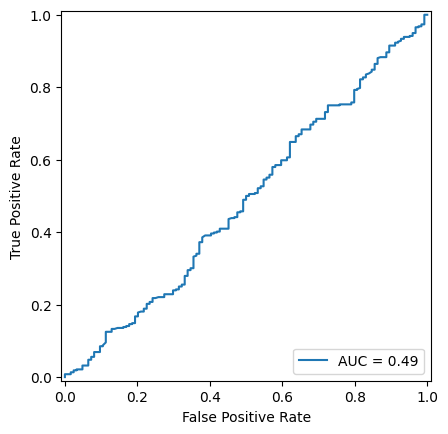

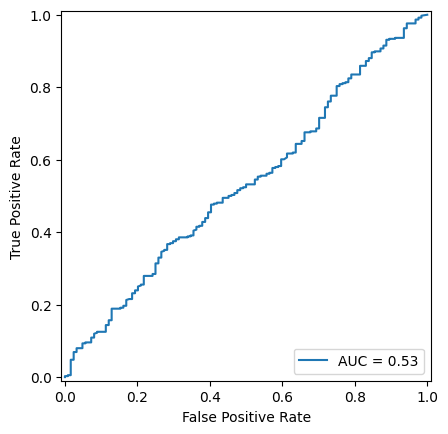

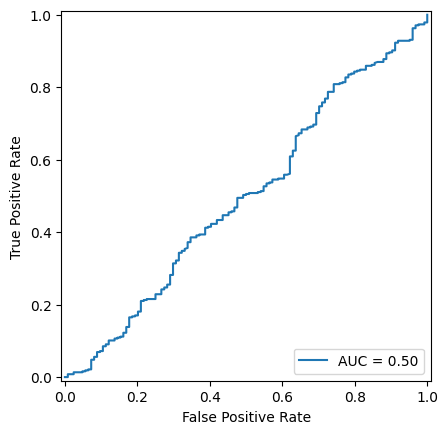

In [112]:
languages = ['xhosa', 'hiligaynon', 'middle_english', 'plaudietsch']

for language in languages:
    data = pd.DataFrame()
    # data['input'] = pd.read_csv(directory + language +'english_tagalog.test', header=None)  # input sentence
    data['score'] = pd.read_csv(directory + language + '_res.txt', header=None).astype(np.float32)  # anomaly score
    data['anomalous'] = 1
    data.loc[:123, 'anomalous'] = 0
    # anomalous or not: 124 * 0
    
    anomalous_data = data[data['anomalous'] == 1]
    sensitivity = len(anomalous_data[anomalous_data['score'] > r]) / len(anomalous_data)

    non_anomalous_data = data[data['anomalous'] == 0]
    specificity = len(non_anomalous_data[non_anomalous_data['score'] < r]) / len(non_anomalous_data)
    # specificity = 1 - specificity

    data['y'] = (data['score'] > r)

    print(specificity * sensitivity)
    fpr, tpr, thresholds = metrics.roc_curve(data['anomalous'], data['score'])
    auc = metrics.auc(fpr, tpr)
    auc = metrics.roc_auc_score(data['anomalous'], data['score'])
    roc = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)
    roc.plot()
    